In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
!pip install -Uqq fastai 'duckduckgo_search>=6.2'

In [20]:
from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): 
    return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [21]:
urls = search_images('grizzly bear', max_images=1)
urls[0]

'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg'

In [7]:
ims = urls

In [8]:
from fastdownload import download_url
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

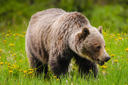

In [9]:
from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(128,128)

In [10]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [24]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images(f'{o} bear', max_images=100)
        len(results)
        download_images(dest, urls=results)

Our folder has image files, as we'd expect:

In [25]:
fns = get_image_files(path)
fns

(#281) [Path('bears/grizzly/78e43ba6-79aa-4c48-b2cd-6d6f79905c0f.jpg'),Path('bears/grizzly/f6502084-7c84-4dd0-b3e0-7e2ff9e6f614.jpg'),Path('bears/grizzly/40e7b0db-2c9d-448a-950e-e77a1a923260.jpg'),Path('bears/grizzly/2b6e0f31-fec8-4560-bb7b-13f4d53d58bb.JPG'),Path('bears/grizzly/30f8ee9d-cc85-46b1-b5c4-cf371b0c4aee.jpg'),Path('bears/grizzly/7b5d8bb7-05fc-461b-b9dd-cf7aeeac519e.JPG'),Path('bears/grizzly/30ee8b8c-140f-4639-8daf-d046da755456.jpg'),Path('bears/grizzly/240fc23d-0479-4c5e-8f0f-253980185517.jpg'),Path('bears/grizzly/e2b859b7-579e-44fa-b7c1-ad16fa50cc85.jpg'),Path('bears/grizzly/541be1a7-8e4e-4779-97c5-aea1df395547.jpg'),Path('bears/grizzly/b1efb7a7-3dbf-4971-b0e9-106d9d88c6bb.jpg'),Path('bears/grizzly/962bb25f-4cca-4be9-af10-40feb9510d2c.jpg'),Path('bears/grizzly/f73c07c9-d1a2-4662-94e2-1a3059fae46b.jpg'),Path('bears/grizzly/d357adbb-7dbf-4d48-991c-da2c2c130d82.jpg'),Path('bears/grizzly/bd6294bf-b7f2-437c-a638-930727d4a16a.jpg'),Path('bears/grizzly/d9adae7a-dcae-4787-bbe9-b91

Look for the failed files

In [ ]:
??verify_images

In [27]:
failed = verify_images(fns)
failed

(#37) [Path('bears/grizzly/2b6e0f31-fec8-4560-bb7b-13f4d53d58bb.JPG'),Path('bears/grizzly/7b5d8bb7-05fc-461b-b9dd-cf7aeeac519e.JPG'),Path('bears/grizzly/240fc23d-0479-4c5e-8f0f-253980185517.jpg'),Path('bears/grizzly/962bb25f-4cca-4be9-af10-40feb9510d2c.jpg'),Path('bears/grizzly/14ad232d-7640-4680-8971-7bcc886df59f.jpg'),Path('bears/grizzly/ab7efed8-aff1-497f-881e-d30d1f426ff1.jpg'),Path('bears/grizzly/d5cba29a-90cf-4499-9aa5-595512ac5d4f.jpg'),Path('bears/grizzly/200330e8-b427-4ad0-8385-b835f13ee00f.jpg'),Path('bears/black/2803cc27-e134-41f5-b18d-ac7f10568888.jpg'),Path('bears/black/2538453a-2c8f-4b94-86fd-912cd49de548.jpg'),Path('bears/black/dcc6ba24-605f-46e8-adbf-33a2a9072b15.jpg'),Path('bears/black/b1feec3c-9981-4229-b2a8-133877beefb8.jpg'),Path('bears/black/25b27884-9b62-4b63-aa80-e05dd058fc0a.jpg'),Path('bears/black/38fc1034-3732-4d4d-a099-a58c359bd45b.jpg'),Path('bears/black/da844192-6068-4324-bcab-982d0570bebf.jpg'),Path('bears/black/f686ab5f-73ef-4516-9ab8-9c1f37347762.jpg'),P

Delete the failed images

In [28]:
failed.map(Path.unlink);

In [29]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [30]:
dls = bears.dataloaders(path)

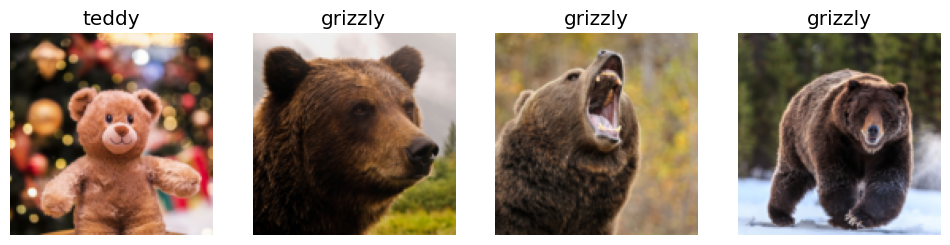

In [31]:
dls.valid.show_batch(max_n=4, nrows=1)

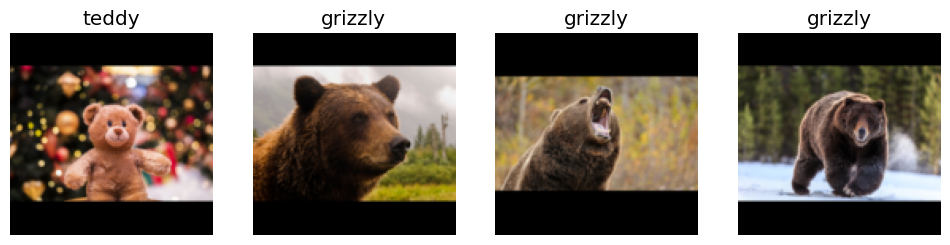

In [32]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [39]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [40]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.677963,0.439648,0.145833,00:32


/opt/conda/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.343044,0.293330,0.041667,00:38
1,0.233535,0.330561,0.041667,00:39
2,0.165715,0.401029,0.041667,00:41
3,0.129019,0.417534,0.041667,00:41


/opt/conda/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/opt/conda/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


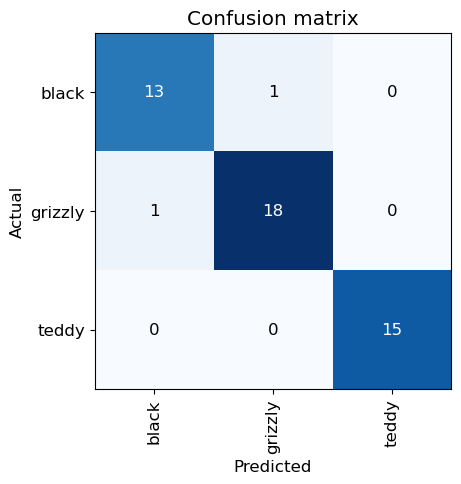

In [41]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

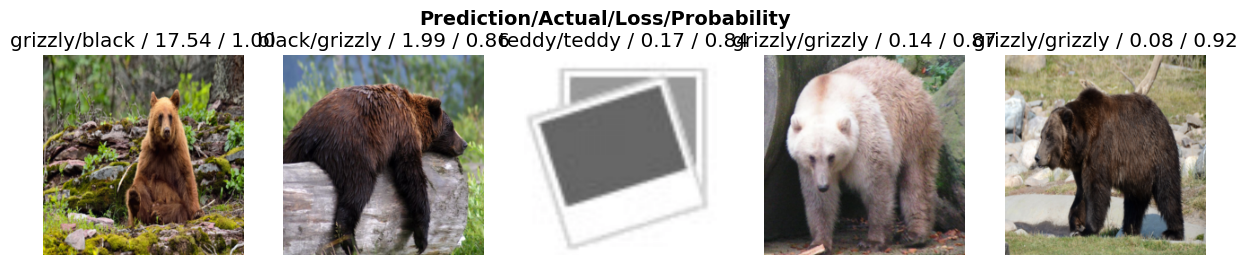

In [42]:
interp.plot_top_losses(5, nrows=1)

In [43]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/opt/conda/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [38]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [44]:
learn.export()

In [46]:
!ls | grep .pkl

export.pkl


In [48]:
??load_learner

Signature:
load_learner(
    fname,
    cpu=True,
    pickle_module=<module 'pickle' from '/opt/conda/lib/python3.12/pickle.py'>,
)
Source:   
def load_learner(fname, cpu=True, pickle_module=pickle):
    "Load a `Learner` object in `fname`, by default putting it on the `cpu`"
    distrib_barrier()
    map_loc = 'cpu' if cpu else default_device()
    try: res = torch.load(fname, map_location=map_loc, pickle_module=pickle_module)
    except AttributeError as e: 
        e.args = [f"Custom classes or functions exported with your `Learner` not available in namespace. Re-declare/import before loading:\n\t{e.args[0]}"]
        raise
    if cpu: 
        res.dls.cpu()
        if hasattr(res, 'channels_last'): res = res.to_contiguous(to_fp32=True)
        elif hasattr(res, 'mixed_precision'): res = res.to_fp32()
        elif hasattr(res, 'non_native_mixed_precision'): res = res.to_non_native_fp32()
    return res
File:      /opt/conda/lib/python3.12/site-packages/fastai/learner.py
Type:      f

In [49]:
# let's try to load the .pkl
learn_inf = load_learner('export.pkl')

In [50]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', tensor(1), tensor([1.0121e-03, 9.9896e-01, 2.8590e-05]))

In [51]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [59]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [58]:
# let's mimic the behavior 
# btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [60]:
img = PILImage.create(btn_upload.data[-1])

In [61]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [62]:
pred,pred_idx,probs = learn_inf.predict(img)

In [63]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: teddy; Probability: 1.0000')

In [64]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [66]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [67]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [68]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])